### zkSync Data Characterization

**[Johnnatan Messias](https://johnnatan-messias.github.io/), June 2024**

In [1]:
import os
import polars as pl

import plotly.graph_objects as go

In [2]:
import sys
code_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "src"))

sys.path.append(code_dir)

In [3]:
# Set directory paths
path_data_dir = os.path.abspath(
    os.path.join(os.getcwd(), "..", "data"))
path_plots_dir = os.path.abspath(os.path.join(path_data_dir, "plots")) + os.sep

# Create directories if they don't exist
os.makedirs(path_data_dir, exist_ok=True)
os.makedirs(path_plots_dir, exist_ok=True)

In [4]:
from plot_utils import get_plotly_layout
from plot_utils import colors
width, height = 800, 450

In [5]:
from utils import events_dict

In [6]:
# Existing dataset
path_parquet = os.path.abspath(os.path.join(path_data_dir, "parquet_files"))
path_data = dict()
path_data['blocks'] = os.path.abspath(
    os.path.join(path_parquet, "blocks", "blocks_*.parquet"))
path_data['transactions'] = os.path.abspath(os.path.join(
    path_parquet, "transactions", "transactions_*.parquet"))
path_data['tx_receipts'] = os.path.abspath(os.path.join(
    path_parquet, "tx_receipts", "tx_receipts_*.parquet"))
path_data['logs'] = os.path.abspath(
    os.path.join(path_parquet, "logs", "logs_*.parquet"))
path_data['l2_to_l1_logs'] = os.path.abspath(os.path.join(
    path_parquet, "l2_to_l1_logs", "l2_to_l1_logs_*.parquet"))

In [7]:
from data_manager import DataManager
dm = DataManager(path_data=path_data)

In [8]:
block_start = 1
block_end = 29_710_983

In [9]:
(pl.scan_parquet(path_data['blocks'])
 .limit(5)
 ).collect(streaming=True)

hash,parentHash,sha3Uncles,miner,stateRoot,transactionsRoot,receiptsRoot,number,l1BatchNumber,gasUsed,gasLimit,baseFeePerGas,extraData,logsBloom,timestamp,l1BatchTimestamp,difficulty,totalDifficulty,sealFields,uncles,size,mixHash,nonce
str,str,str,str,str,str,str,i64,str,i64,i64,i64,str,str,i64,str,i64,i64,list[null],list[null],i64,str,str
"""0xe8e77626586f73b955364c7b4bbf…","""0x0000000000000000000000000000…","""0x1dcc4de8dec75d7aab85b567b6cc…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…",0,"""0x0""",0,4294967295,0,"""0x""","""0x0000000000000000000000000000…",0,"""0x0""",0,0,[],[],0,"""0x0000000000000000000000000000…","""0x0000000000000000"""
"""0x51f81bcdfc324a0dff2b5bec9d92…","""0xe8e77626586f73b955364c7b4bbf…","""0x1dcc4de8dec75d7aab85b567b6cc…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…",1,"""0x1""",432000000,4294967295,500000000,"""0x""","""0x0000000000000000000000000000…",1676384542,"""0x63eb991e""",0,0,[],[],0,"""0x0000000000000000000000000000…","""0x0000000000000000"""
"""0x2ee5f854d076701c8753d7277918…","""0x51f81bcdfc324a0dff2b5bec9d92…","""0x1dcc4de8dec75d7aab85b567b6cc…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…",2,"""0x1""",0,4294967295,500000000,"""0x""","""0x0000000000000000000000000000…",1676384560,"""0x63eb991e""",0,0,[],[],0,"""0x0000000000000000000000000000…","""0x0000000000000000"""
"""0x3ef5a213fe22de1cea28d60f5183…","""0x2ee5f854d076701c8753d7277918…","""0x1dcc4de8dec75d7aab85b567b6cc…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…",3,"""0x2""",10000000,4294967295,500000000,"""0x""","""0x0000000000000000000000000000…",1676429272,"""0x63ec47d8""",0,0,[],[],0,"""0x0000000000000000000000000000…","""0x0000000000000000"""
"""0xcc21cc9477a6aea5df8cae73422b…","""0x3ef5a213fe22de1cea28d60f5183…","""0x1dcc4de8dec75d7aab85b567b6cc…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…","""0x0000000000000000000000000000…",4,"""0x2""",0,4294967295,500000000,"""0x""","""0x0000000000000000000000000000…",1676431072,"""0x63ec47d8""",0,0,[],[],0,"""0x0000000000000000000000000000…","""0x0000000000000000"""


In [10]:
(pl.scan_parquet(path_data['transactions'])
 .limit(5)
 ).collect(streaming=True)

blockHash,blockNumber,chainId,from,gas,gasPrice,hash,input,l1BatchNumber,l1BatchTxIndex,maxFeePerGas,maxPriorityFeePerGas,nonce,r,s,to,transactionIndex,type,v,value
str,i64,i64,str,i64,i64,str,str,str,str,i64,i64,i64,str,str,str,i64,i64,f64,str
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,324,"""0x29DF43F75149D0552475A6f9B2aC…",72000000,0,"""0xe9a1a8601bc9199c80c97169fdc9…","""0x3cda335100000000000000000000…","""0x1""","""0x0""",0,0,0,null,null,"""0x0000000000000000000000000000…",0,255,null,"""0x0"""
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,324,"""0xC301f8B2a2C08958E6e7a286AB49…",72000000,0,"""0x0817b7b518df03a0f6a35e3e9a36…","""0x""","""0x1""","""0x1""",0,0,0,null,null,"""0x0000000000000000000000000000…",1,255,null,"""0x0"""
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,324,"""0x29DF43F75149D0552475A6f9B2aC…",72000000,0,"""0x7e58442675505ffb1a98145109df…","""0x3cda335100000000000000000000…","""0x1""","""0x2""",0,0,0,null,null,"""0x0000000000000000000000000000…",2,255,null,"""0x0"""
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,324,"""0xC301f8B2a2C08958E6e7a286AB49…",72000000,0,"""0x3277dca719c8afde9b713594b348…","""0x""","""0x1""","""0x3""",0,0,0,null,null,"""0x0000000000000000000000000000…",3,255,null,"""0x0"""
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,324,"""0x689a1966931eB4Bb6fB81430E6ce…",72000000,0,"""0x0853a7e2c7977d8d3badb8e3c2ad…","""0x3cda335100000000000000000000…","""0x1""","""0x4""",0,0,0,null,null,"""0x0000000000000000000000000000…",4,255,null,"""0x0"""


In [11]:
(pl.scan_parquet(path_data['tx_receipts'])
 .limit(5)
 ).collect(streaming=True)

blockHash,blockNumber,contractAddress,cumulativeGasUsed,effectiveGasPrice,from,gasUsed,l1BatchNumber,l1BatchTxIndex,logsBloom,root,status,to,transactionHash,transactionIndex,type
str,i64,str,i64,i64,str,i64,str,str,str,str,i64,str,str,i64,i64
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x8DFc713D3c52402dc70687afe58E…",0,0,"""0x29DF43F75149D0552475A6f9B2aC…",72000000,"""0x1""","""0x0""","""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x0000000000000000000000000000…","""0xe9a1a8601bc9199c80c97169fdc9…",0,255
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,null,0,0,"""0xC301f8B2a2C08958E6e7a286AB49…",72000000,"""0x1""","""0x1""","""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x0000000000000000000000000000…","""0x0817b7b518df03a0f6a35e3e9a36…",1,255
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,null,0,0,"""0x29DF43F75149D0552475A6f9B2aC…",72000000,"""0x1""","""0x2""","""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",0,"""0x0000000000000000000000000000…","""0x7e58442675505ffb1a98145109df…",2,255
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,null,0,0,"""0xC301f8B2a2C08958E6e7a286AB49…",72000000,"""0x1""","""0x3""","""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x0000000000000000000000000000…","""0x3277dca719c8afde9b713594b348…",3,255
"""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x6d7a34EB3055549866A227Df64E9…",0,0,"""0x689a1966931eB4Bb6fB81430E6ce…",72000000,"""0x1""","""0x4""","""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x0000000000000000000000000000…","""0x0853a7e2c7977d8d3badb8e3c2ad…",4,255


In [12]:
(pl.scan_parquet(path_data['logs'])
 .limit(5)
 ).collect(streaming=True)

address,blockHash,blockNumber,data,l1BatchNumber,logIndex,logType,removed,transactionHash,transactionIndex,transactionLogIndex,topics_0,topics_1,topics_2,topics_3
str,str,i64,str,str,i64,null,bool,str,i64,str,str,str,str,str
"""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x""","""0x1""",0,null,false,"""0xe9a1a8601bc9199c80c97169fdc9…",0,"""0x0""","""0xc94722ff13eacf53547c4741dab5…","""0x010000553109a66f1432eb2286c5…","""0x0000000000000000000000000000…",null
"""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x""","""0x1""",1,null,false,"""0xe9a1a8601bc9199c80c97169fdc9…",0,"""0x1""","""0x290afdae231a3fc0bbae8b1af636…","""0x00000000000000000000000029df…","""0x010000553109a66f1432eb2286c5…","""0x0000000000000000000000008dfc…"
"""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x0000000000000000000000000000…","""0x1""",2,null,false,"""0xe9a1a8601bc9199c80c97169fdc9…",0,"""0x2""","""0x0f6798a560793a54c3bcfe86a93c…","""0x00000000000000000000000029df…",null,null
"""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x""","""0x1""",3,null,false,"""0x0817b7b518df03a0f6a35e3e9a36…",1,"""0x3""","""0xc94722ff13eacf53547c4741dab5…","""0x0100009979ec46148a5389799061…","""0x0000000000000000000000000000…",null
"""0x0000000000000000000000000000…","""0x51f81bcdfc324a0dff2b5bec9d92…",1,"""0x""","""0x1""",4,null,false,"""0x0817b7b518df03a0f6a35e3e9a36…",1,"""0x4""","""0xc94722ff13eacf53547c4741dab5…","""0x0100033fd2449be163d507a88011…","""0x0000000000000000000000000000…",null


In [13]:
(pl.scan_parquet(path_data['l2_to_l1_logs'])
 .limit(5)
 ).collect(streaming=True)

blockHash,blockNumber,isService,key,l1BatchNumber,logIndex,sender,shardId,transactionHash,transactionIndex,transactionLogIndex,txIndexInL1Batch,value
str,str,bool,str,str,str,str,str,str,str,str,str,str
"""0x51f81bcdfc324a0dff2b5bec9d92…","""0x1""",false,"""0x0000000000000000000000000000…","""0x1""","""0x0""","""0x0000000000000000000000000000…","""0x0""","""0xe9a1a8601bc9199c80c97169fdc9…","""0x0""","""0x0""","""0x0""","""0xbc59c242d551e3939b9b2939b8b6…"
"""0x51f81bcdfc324a0dff2b5bec9d92…","""0x1""",true,"""0xe9a1a8601bc9199c80c97169fdc9…","""0x1""","""0x1""","""0x0000000000000000000000000000…","""0x0""","""0xe9a1a8601bc9199c80c97169fdc9…","""0x0""","""0x1""","""0x0""","""0x0000000000000000000000000000…"
"""0x51f81bcdfc324a0dff2b5bec9d92…","""0x1""",true,"""0x0817b7b518df03a0f6a35e3e9a36…","""0x1""","""0x2""","""0x0000000000000000000000000000…","""0x0""","""0x0817b7b518df03a0f6a35e3e9a36…","""0x1""","""0x0""","""0x1""","""0x0000000000000000000000000000…"
"""0x51f81bcdfc324a0dff2b5bec9d92…","""0x1""",true,"""0x7e58442675505ffb1a98145109df…","""0x1""","""0x3""","""0x0000000000000000000000000000…","""0x0""","""0x7e58442675505ffb1a98145109df…","""0x2""","""0x0""","""0x2""","""0x0000000000000000000000000000…"
"""0x51f81bcdfc324a0dff2b5bec9d92…","""0x1""",true,"""0x3277dca719c8afde9b713594b348…","""0x1""","""0x4""","""0x0000000000000000000000000000…","""0x0""","""0x3277dca719c8afde9b713594b348…","""0x3""","""0x0""","""0x3""","""0x0000000000000000000000000000…"


### Number of contracts deployed on zkSync from block number 1 (Feb. 14th, 2023) to block number 29,710,983 (Mar. 24th, 2024).

In [14]:
num_contracts_deployed = dm.get_total_number_of_deployed_contracts(
    block_max=block_end).n_unique()
print("From February 14th, 2023, to March 24th, 2024, there were {} contracts deployed on zkSync.".format(
    num_contracts_deployed))

From February 14th, 2023, to March 24th, 2024, there were 1631052 contracts deployed on zkSync.


In [15]:
n_transactions = dm.get_total_number_of_transactions(block_start, block_end)
block_info = dm.get_block_info(block_start, block_end)
n_blocks = dm.get_total_number_of_blocks(block_start, block_end)
topics_count = dm.get_total_number_of_topics()
called_contracts = dm.get_total_number_of_contract_calls()
transfer_events_df = dm.get_number_of_transfers_events(
    block_min=block_start, block_max=block_end)

transfer_events_filtered_df = dm.get_number_of_transfers_events_filtered(
    block_min=block_start, block_max=block_end)

number_of_addresses = dm.get_number_of_unique_addresses(block_start, block_end)

print(
    "There are {} transactions and {} blocks in our dataset.".format(n_transactions, n_blocks))
print(
    "Blocks range from {} ({}) to {} ({})".format(block_info['min_number'][0], block_info['min_timestamp'][0], block_info['max_number'][0], block_info['max_timestamp'][0]))

print("There are {} different topics in the logs and a total of {} events.".format(
    topics_count.shape[0], topics_count['len'].sum()))

print("There are {} different contracts called in the logs and a total of {} events.".format(
    called_contracts.shape[0], called_contracts['len'].sum()))

print("There are {} transfer events.".format(transfer_events_df['len'].sum()))
print("There are {} transfer filtered events.".format(
    transfer_events_filtered_df['len'].sum()))
print("There are {} addresses/nodes in the dataset.".format(number_of_addresses))

There are 327174035 transactions and 29710983 blocks in our dataset.
Blocks range from 1 (2023-02-14 14:22:22) to 29710983 (2024-03-24 00:00:00)
There are 14388 different topics in the logs and a total of 2044221151 events.
There are 981892 different contracts called in the logs and a total of 2044221151 events.
There are 1479714503 transfer events.
There are 704720525 transfer filtered events.
There are 7322502 addresses/nodes in the dataset.


There are 1631772 contracts deployed on zkSync during the analyzed block range


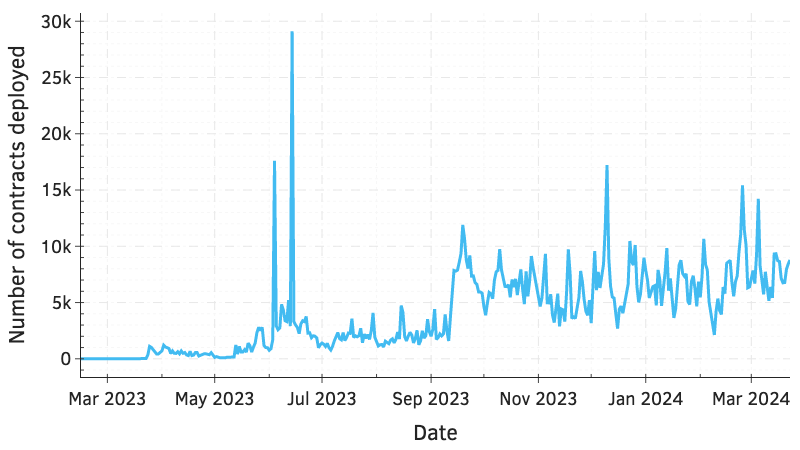

In [16]:
# Distribution of the number of contracts deployed per day on zkSync

contracts_deployed_per_day = dm.get_number_of_contracts_per_day(
    block_start, block_end)
print("There are {} contracts deployed on zkSync during the analyzed block range".format(
    contracts_deployed_per_day['len'].sum()))

fig = go.Figure(layout=get_plotly_layout(width=width, height=height))
fig.add_trace(go.Scatter(
    x=contracts_deployed_per_day['date'], y=contracts_deployed_per_day['len'], line=dict(color=colors['blue'], width=3, dash='solid'), mode='lines', name='Transactions'))

fig.update_layout(yaxis_title="Number of contracts deployed",
                  xaxis_title="Date", legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))

fig.write_image(path_plots_dir+'number-of-contracts-deployed.pdf')
fig.show('png')

In [17]:
n_topics = topics_count['len'].sum()
for row in topics_count.head(20).rows():
    topic_name = 'Unknown'
    topic_signature = 'Unknown'
    if row[0] in events_dict:
        topic_name = events_dict[row[0]]['name']
        topic_signature = events_dict[row[0]]['signature']
    print(
        f"{row[0]}\t{topic_name}\t{topic_signature}\t{row[1]}\t{round(100*row[1]/n_topics, 2)}")

0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef	Transfer	Transfer(address,address,uint256)	1487353036	72.76
0x8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925	Approval	Approval(address,address,uint256)	122654931	6.0
0xd78ad95fa46c994b6551d0da85fc275fe613ce37657fb8d5e3d130840159d822	Swap	Swap(address,uint256,uint256,uint256,uint256,address)	70323651	3.44
0xcf2aa50876cdfbb541206f89af0ee78d44a2abf8d328e37fa4917f982149848a	Sync	Sync(uint256,uint256)	61848858	3.03
0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78be50e062b03a9fffbbad1	Sync	Sync(uint112,uint112)	16883873	0.83
0xf26bfd49b39c52efaf04ee7f21ca2fdc73c680fada92ab7a8f1ea37b350bcf8c	Message	Message(string,address,string)	16685105	0.82
0x3b841dc9ab51e3104bda4f61b41e4271192d22cd19da5ee6e292dc8e2744f713	Swap	Swap(address,address,bool,bool,uint256,uint256,int32)	12443645	0.61
0xebf2df875b555f5edaef342e52b6a9498cccaec4813df8eb0f3842acc6d08281	Fees	Fees(address,uint256,uint256,uint256,uint256)	10164964	0.5
0x

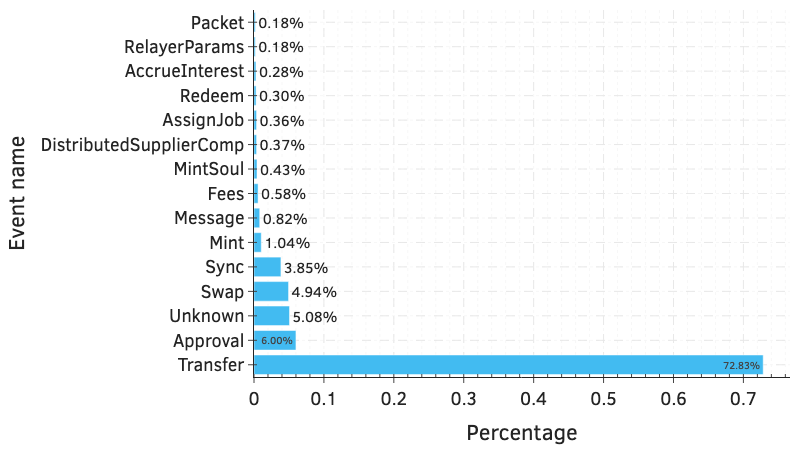

In [18]:
# Plot of the top 15 most called events
topics_count = topics_count.with_columns(event_name=pl.col('topics_0').map_elements(
    lambda x: events_dict[x]['name'] if x in events_dict else 'Unknown', return_dtype=pl.String))

data = topics_count.group_by('event_name').agg(
    pl.col('len').sum().alias('total')).sort('total', descending=True).head(15)
data = data.with_columns(percentage=data['total']/topics_count['len'].sum())
fig = go.Figure(layout=get_plotly_layout(width=width, height=height))
fig.add_trace(go.Bar(y=data['event_name'], x=data['percentage'],
                     text=data['percentage'], texttemplate='%{text:.2%}', textposition='auto', marker_color=colors['blue'], orientation='h',))
# fig.update_xaxes(tickangle=45)
fig.update_layout(
    yaxis_title="Event name",
    xaxis_title="Percentage",
)

fig.write_image(path_plots_dir+"top-events-called.pdf",
                width=width, height=height)
fig.show('png')

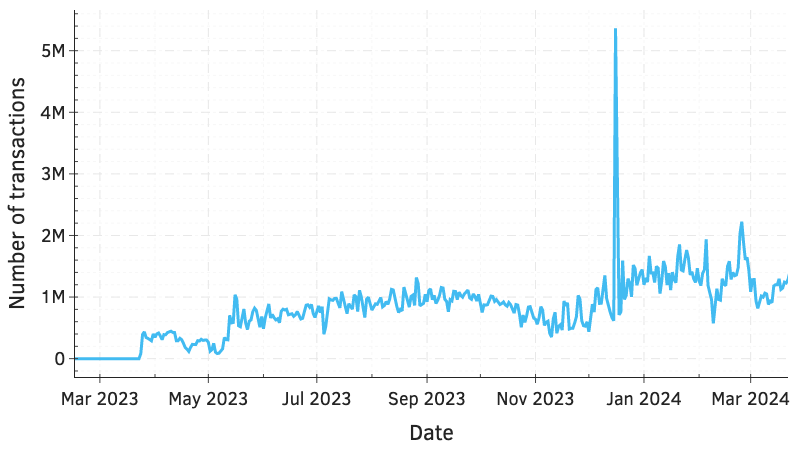

In [19]:
# Distribution of the number of transactions per day on zkSync
txs_per_day = dm.get_transactions_per_day_dist(block_start, block_end)

fig = go.Figure(layout=get_plotly_layout(width=width, height=height))
fig.add_trace(go.Scatter(
    x=txs_per_day['date'], y=txs_per_day['len'], line=dict(color=colors['blue'], width=3, dash='solid'), mode='lines', name='Transactions'))

fig.update_layout(yaxis_title="Number of transactions",
                  xaxis_title="Date", legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))
fig.update_xaxes(range=['2023-02-15', '2024-03-22'])

fig.write_image(path_plots_dir+'number-of-transactions.pdf')
fig.show('png')

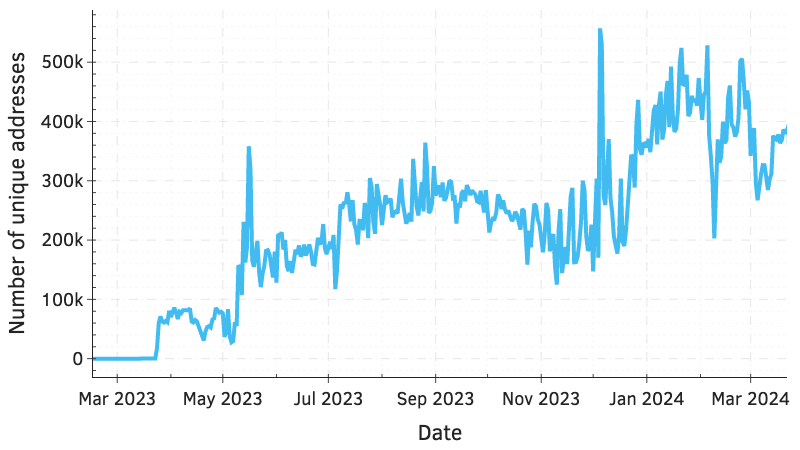

In [20]:
# Number of unique addresses per day on zkSync Era

n_unique_addresses = dm.get_number_of_daily_active_users(
    block_min=block_start, block_max=block_end)

fig = go.Figure(layout=get_plotly_layout(width=width, height=height))
fig.add_trace(go.Scatter(
    x=n_unique_addresses['date'], y=n_unique_addresses['unique_issuers_per_day'],
    line=dict(color=colors['blue'], width=4, dash='solid'),  mode='lines', name='All'))

fig.update_xaxes(range=['2023-02-15', '2024-03-22'])

fig.update_layout(yaxis_title="Number of unique addresses",
                  xaxis_title="Date", legend=dict(xanchor='center',
                                                  x=0.5, y=1.1, orientation='h'))

fig.write_image(path_plots_dir+'number-of-unique-addresses-zksync.pdf')
fig.show('png')